# Analysis of Themeforest Data

In [74]:
!pip3 install tabulate
import pandas as pd
import seaborn as sns
from datetime import datetime

  Using cached https://files.pythonhosted.org/packages/c4/f4/770ae9385990f5a19a91431163d262182d3203662ea2b5739d0fcfc080f1/tabulate-0.8.7-py3-none-any.whl


In [75]:
df = pd.read_csv("final_data.csv")

## Preprocessing of data

In [76]:
df['price'] = df['price'].apply(lambda x:int(x.replace("$","")))
df['sales'] = df['sales'].apply(lambda x:float(x.replace("K",""))*1000 if("K" in x) else float(x))

In [77]:
def change_time(x):
    x = x.split(" ")
    x[2] = "20"+x[2]
    x = " ".join(x)
    return datetime.strptime(x, '%d %b %Y').strftime("%d-%b-%Y")
    
df["last_updated"] = df["last_updated"].apply(lambda x: change_time(x))

In [78]:
# Now we will extract the data for Sub sub category as it is very sparse
super_sub_cat = df.filter(['price','sales','sub_sub_cat'],axis=1)

In [79]:
df = df.drop(["sub_sub_cat","Unnamed: 0"],axis=1)

In [80]:
df = df.drop_duplicates()

# Question To be Answer

#### How many templates are there in total?

#### How many templates are there per subcategory?

#### Which main, subcategories and sub sub category are the most sales?

#### Are there categories / sub categories that don’t have a lot of templates of but is high on sales?

#### What price has generated the most sales?

#### What kind of tags is the most popular?


## Question1: How many templates are there in total?

In [81]:
print(f"The number of records found are: {len(df)}")

The number of records found are: 24059


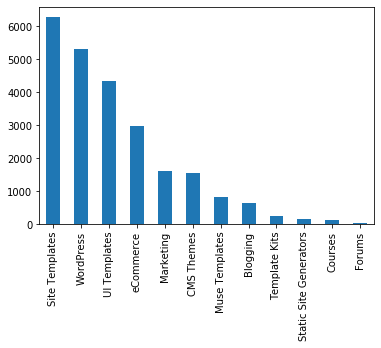

In [82]:
df['category'].value_counts().plot(kind='bar')

## Question2: How many templates are there per subcategory?

In [83]:
df['sub_category'].value_counts()

PSD Templates             3849
Retail                    2262
Corporate                 1787
Creative                  1750
Entertainment             1206
Joomla                     954
Technology                 919
PrestaShop                 889
Shopify                    841
Landing Pages              826
Nonprofit                  775
Blog Magazine              665
Magento                    569
OpenCart                   550
Specialty Pages            545
Drupal                     499
Personal                   466
Email Templates            460
Miscellaneous              351
eCommerce                  336
Sketch                     331
Tumblr                     302
Mobile                     297
Admin Templates            296
Unbounce Landing Pages     275
Elementor                  249
Education                  243
Wedding                    230
Real Estate                180
Ghost Themes               169
Blogger                    156
Landing                     90
Bigcomme

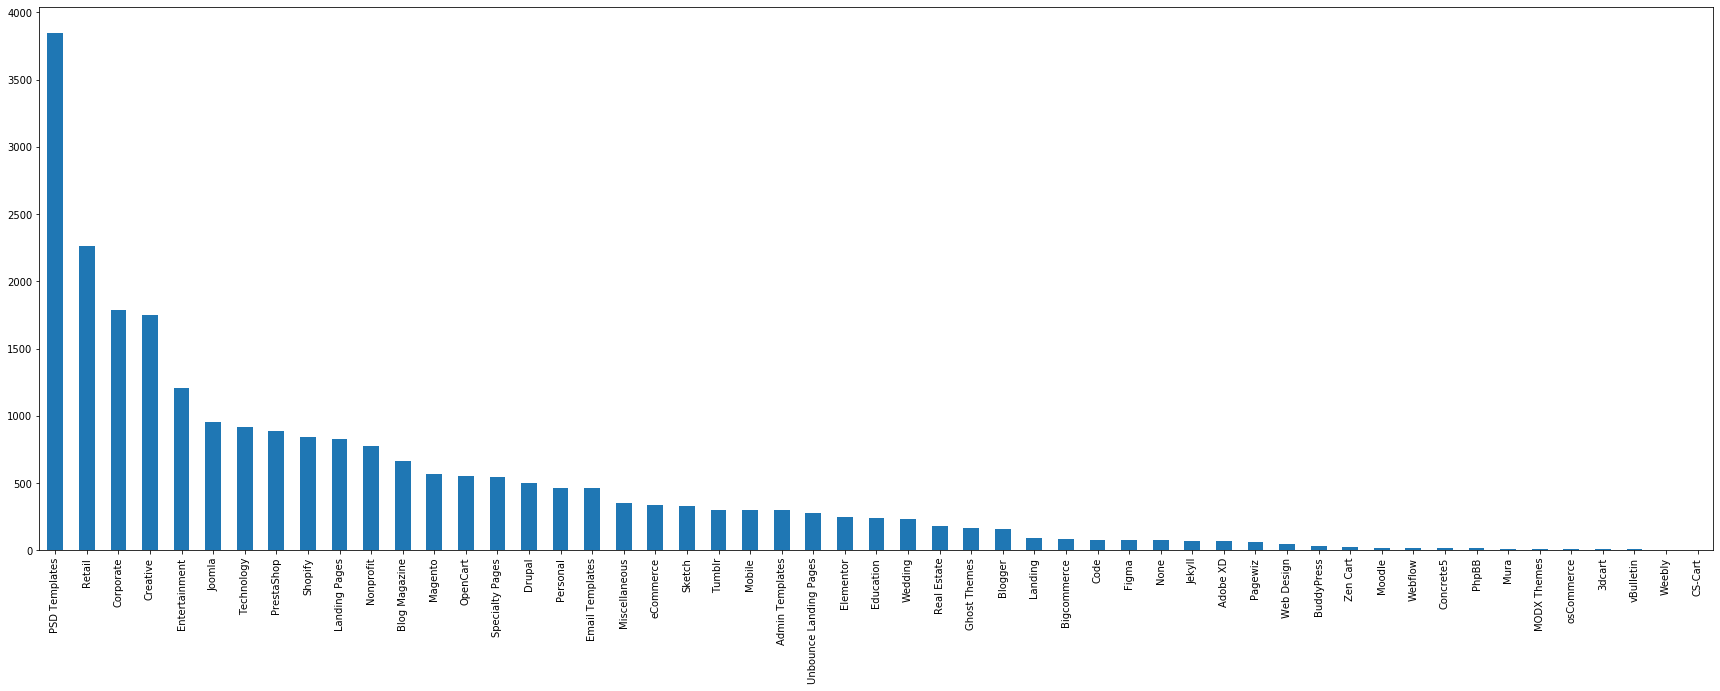

In [84]:
df['sub_category'].value_counts().plot(kind='bar',figsize=(30,10))

## Question 3:Which main, subcategories and sub sub category are the most sales?

### Main Category

In [85]:
#This is the data for top 500 sales
df = df.sort_values(by='sales',ascending=False)
top_500 = df[:500]
top_500['category'].value_counts()

WordPress         395
Site Templates     63
eCommerce          21
Marketing          14
CMS Themes          3
Forums              2
Muse Templates      1
UI Templates        1
Name: category, dtype: int64

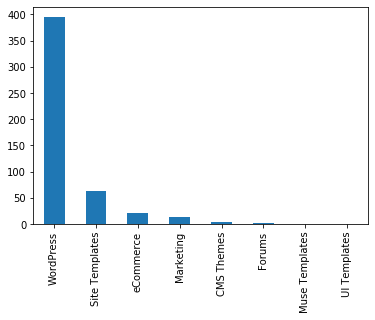

In [86]:
top_500['category'].value_counts().plot(kind='bar')

In [87]:
#This is the table for overall sales
group = df.groupby(["category"]).sum()
group.sort_values("sales",ascending=False).drop(['price'],axis=1)

,sales
category,
WordPress,7771320.0
Site Templates,1925611.0
eCommerce,496918.0
Marketing,345808.0
CMS Themes,175341.0
UI Templates,137343.0
Muse Templates,60603.0
Blogging,58639.0
Forums,22292.0


### Subcategory

In [88]:
#This is the data of top 500 sales
top_500['category'].value_counts()

WordPress         395
Site Templates     63
eCommerce          21
Marketing          14
CMS Themes          3
Forums              2
Muse Templates      1
UI Templates        1
Name: category, dtype: int64

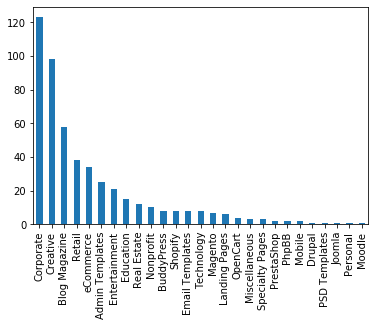

In [89]:
top_500['sub_category'].value_counts().plot(kind='bar')

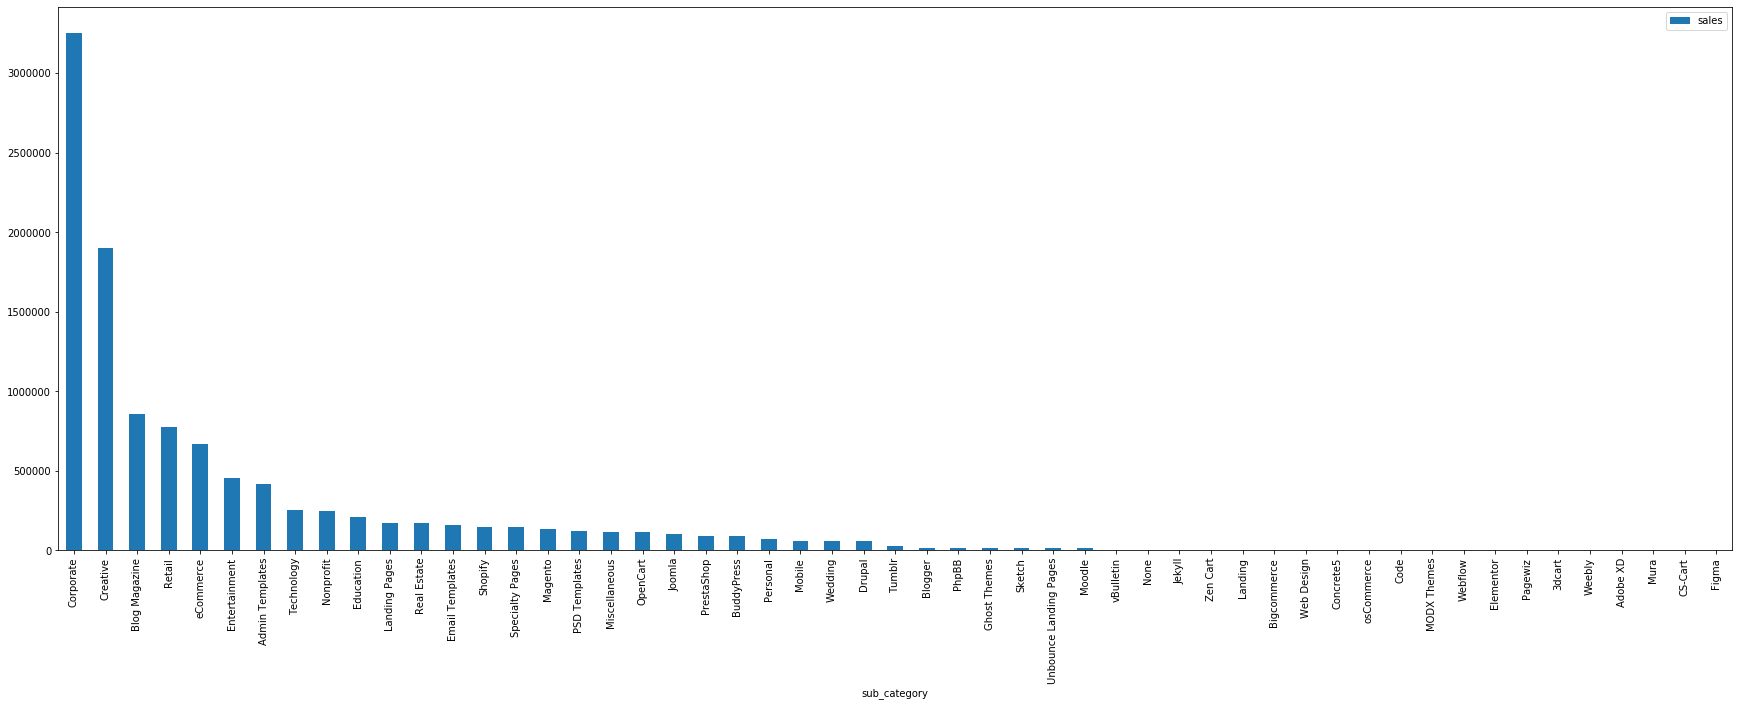

In [90]:
#This is the table for overall sales
group = df.groupby(["sub_category"]).sum()
group.sort_values("sales",ascending=False).drop(['price'],axis=1).plot(kind="bar",figsize=(30,10))

In [91]:
group.sort_values("sales",ascending=False).drop(['price'],axis=1)

,sales
sub_category,
Corporate,3253475.0
Creative,1902075.0
Blog Magazine,859479.0
Retail,772992.0
eCommerce,668338.0
Entertainment,453433.0
Admin Templates,417254.0
Technology,254534.0
Nonprofit,250458.0


### Sub Sub Category

In [92]:
super_sub_cat=super_sub_cat.drop(super_sub_cat.loc[super_sub_cat['sub_sub_cat']=="None"].index)

In [93]:
super_sub_cat = super_sub_cat.sort_values(by='sales',ascending=False)
topSSC_500 = super_sub_cat[:500]
topSSC_500['sub_sub_cat'].value_counts()

business                 97
portfolio                53
woocommerce              45
photography              32
news-editorial           31
health-beauty            29
personal                 27
directory-listings       27
travel                   27
music-and-bands          20
software                 12
restaurants-cafes        10
corporate                 9
fashion                   9
newsletters               8
marketing                 8
shopping                  6
hosting                   5
charity                   5
events                    5
political                 5
under-construction        5
food                      5
churches                  4
technology                3
children                  2
environmental             2
film-tv                   2
creative                  2
miscellaneous             2
cart66                    1
virtual-business-card     1
retail                    1
Name: sub_sub_cat, dtype: int64

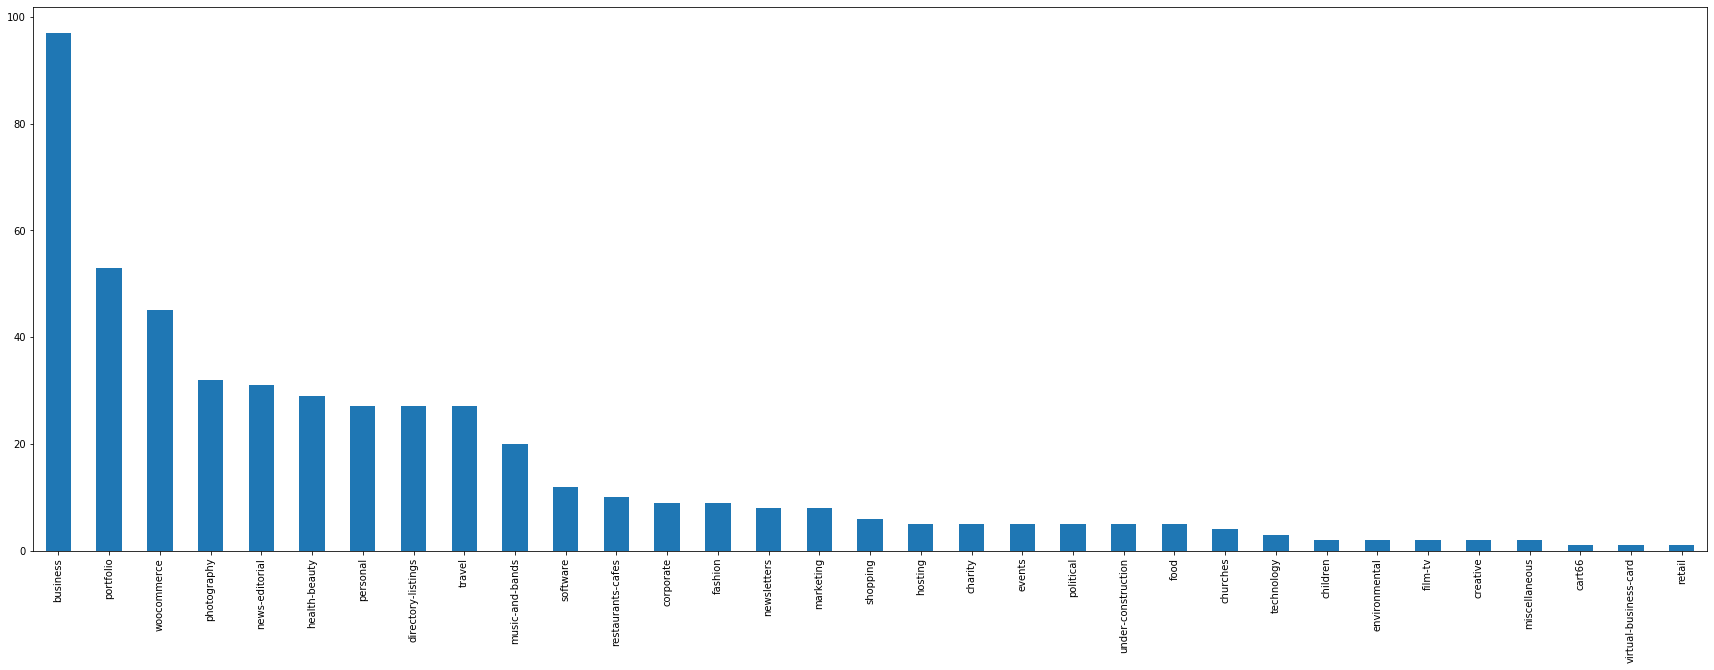

In [94]:
topSSC_500['sub_sub_cat'].value_counts().plot(kind="bar",figsize=(30,10))

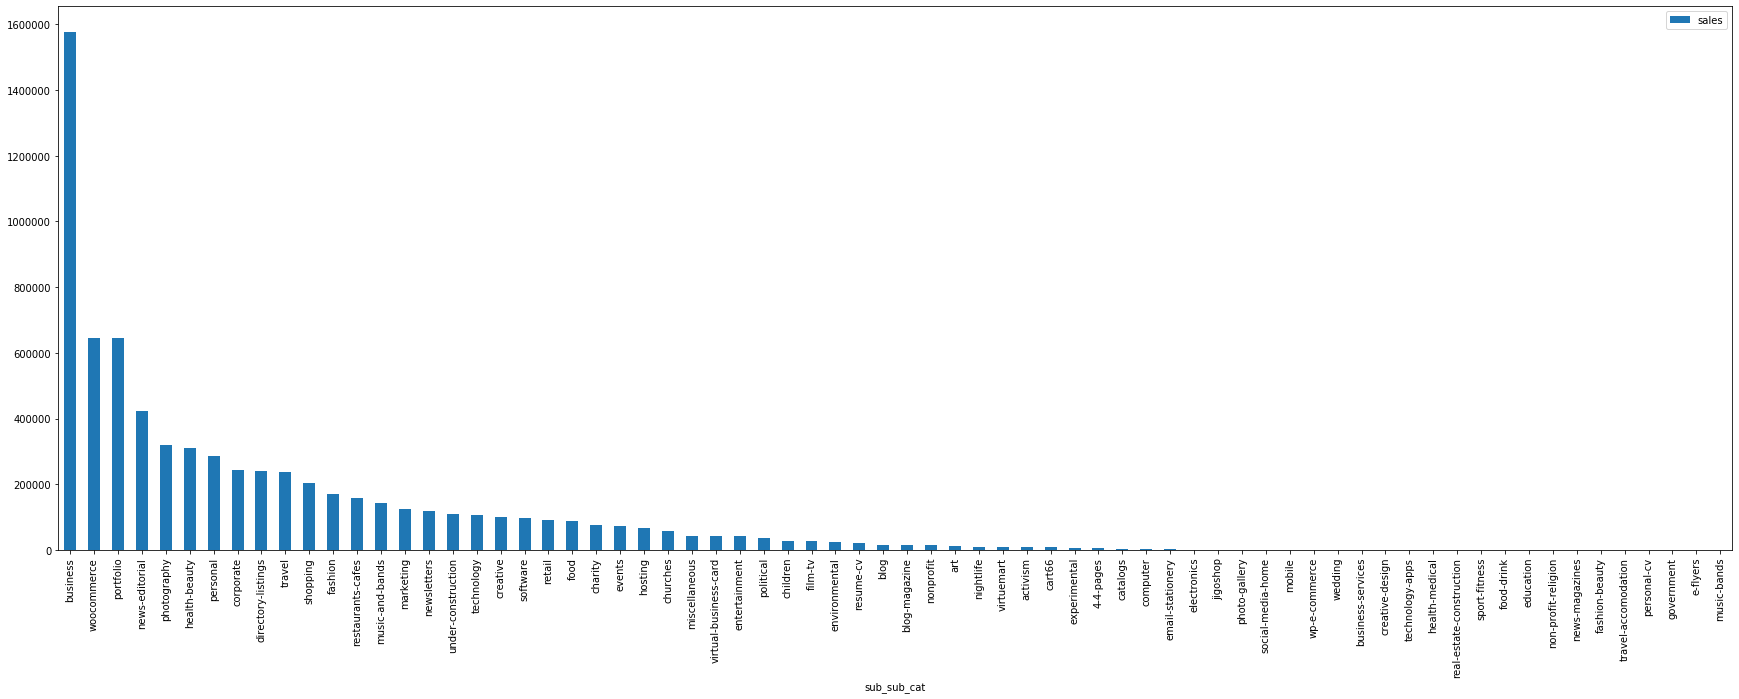

In [95]:
#This is the table for overall sum of sales
group = super_sub_cat.groupby(["sub_sub_cat"]).sum()
group.sort_values("sales",ascending=False).drop(['price'],axis=1).plot(kind="bar",figsize=(30,10))

In [96]:
group.sort_values("sales",ascending=False).drop(['price'],axis=1)

,sales
sub_sub_cat,
business,1576202.0
woocommerce,646477.0
portfolio,644346.0
news-editorial,422108.0
photography,319885.0
...,...
travel-accomodation,18.0
personal-cv,14.0
government,11.0


## Question 4:Are there categories / sub categories that don’t have a lot of templates of but is high on sales?

####  for that purpose we will see the category which are less than 500 in occurance.

## Main Category 

In [97]:
# We are taking those sub category whose occurances are less than 500

count = dict(df['category'].value_counts())
small_categories = [k for k in count if count[k]<500]
cat_x=[]
cat_y=[]
for e in small_categories:
    data = top_500[top_500["category"]==e]
    if(len(data)>0):
        for i in range(len(data)):
            cat_x.append((data["category"].iloc[i])+"_"+(data["names"].iloc[i]))
            cat_y.append((data["sales"].iloc[i]))
            

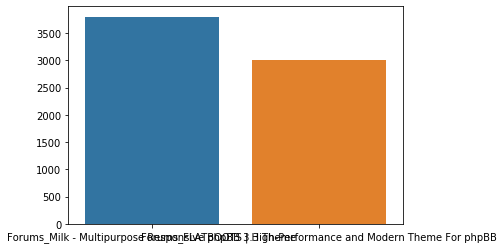

In [99]:
sns.barplot(cat_x,cat_y)

#### Above we can see 2 themes of Forum category are on the top of sales list

## SubCategory

In [100]:
# e are taking those sub category whose occurances are less than 200
count = dict(df['sub_category'].value_counts())
small_categories = [k for k in count if count[k]<200]
cat_x=[]
cat_y=[]
links = []
for e in small_categories:
    data = top_500[top_500["sub_category"]==e]
    if(len(data)>0):
        for i in range(len(data)):
            cat_x.append((data["sub_category"].iloc[i])+"_"+str(i+1))
            links.append(data["url"].iloc[i])
            cat_y.append((data["sales"].iloc[i]))

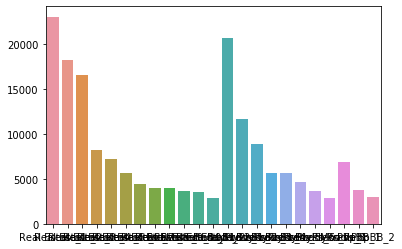

In [101]:
sns.barplot(cat_x,cat_y)

In [66]:
tab_data=[["name","sale","link"]]
for i in range(len(cat_x)):
    tab_data.append([cat_x[i],cat_y[i],links[i]])
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(tab_data, tablefmt='html')))

name,sale,link
Real Estate_1,23000.0,https://themeforest.net/item/real-homes-wordpress-real-estate-theme/5373914
Real Estate_2,18200.0,https://themeforest.net/item/houzez-real-estate-wordpress-theme/15752549
Real Estate_3,16500.0,https://themeforest.net/item/wp-residence-real-estate-wordpress-theme/7896392
Real Estate_4,8200.0,https://themeforest.net/item/wp-pro-real-estate-7-responsive-real-estate-wordpress-theme/12473778
Real Estate_5,7200.0,https://themeforest.net/item/wp-rentals-booking-accommodation-wordpress-theme/12921802
Real Estate_6,5700.0,https://themeforest.net/item/realia-responsive-real-estate-wordpress-theme/4789838
Real Estate_7,4400.0,https://themeforest.net/item/myhome-real-estate-wordpress-theme/19508653
Real Estate_8,4000.0,https://themeforest.net/item/wp-estate-real-estate-responsive-wordpress-theme/5042235
Real Estate_9,4000.0,https://themeforest.net/item/realtyspace-real-estate-wordpress-theme/15965811
Real Estate_10,3600.0,https://themeforest.net/item/reales-wp-real-estate-wordpress-theme/10330568


## Question 5:What price has generated the most sales?

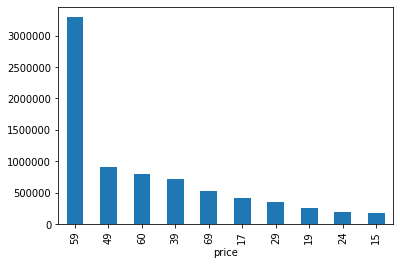

In [102]:
group = df.groupby(["price"]).sum()
most_sale_by_price = group.sort_values(by='sales',ascending=False).head(10)
most_sale_by_price['sales'].plot(kind='bar')

In [103]:
group.sort_values(by='sales',ascending=False)

,sales
price,
59,3295555.0
49,900528.0
60,797238.0
39,722480.0
69,520859.0
...,...
162,12.0
200,7.0
118,5.0


## Question 6:What kind of tags is the most popular?

 #### Top 10 most popular tags

In [69]:
frequency={}
for i in range(len(df)):
    try:
        x = df['tags'].iloc[i].split(",")
        x = [e.strip() for e in x]
        for e in x:
            if e in frequency.keys():
                frequency[e]+=1
            else:
                frequency[e]=1
    except:
        pass
order_freq = {k: v for k, v in sorted(frequency.items(), reverse=True,key=lambda item: item[1])}
key = list(order_freq.keys())
values = list(order_freq.values())


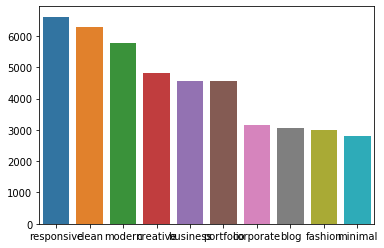

In [70]:
sns.barplot(key[:10],values[:10])

In [72]:
tags_table=[["Tag","Occurance"]]
for i in range(10):
    tags_table.append([key[i],values[i]])
display(HTML(tabulate.tabulate(tags_table, tablefmt='html')))

Tag,Occurance
responsive,6611
clean,6296
modern,5767
creative,4816
business,4555
portfolio,4543
corporate,3150
blog,3063
fashion,2990
minimal,2814
